In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math

In [2]:
# parameters of the true (unknown) demand model
true_slop = 30
true_intercept = -5

In [3]:
eta = 0.999
num_episodes = 2500
stock = 40
prices = [1.99, 2.49, 2.99, 3.49, 3.99, 4.49]
horizon_steps = 20
initial_price = 5
lambda_ = 0.9

In [4]:
def retrieve_linear_demand(a, t): 
    demand = true_slop + true_intercept * prices[a] +0.1*math.exp(t/4)
    return np.random.poisson(demand, 1)[0]

In [5]:
Q = np.zeros((stock+1,len(prices)),dtype=float)
E = np.zeros((stock+1,len(prices)),dtype=float)

In [6]:
num_visited = np.zeros((stock+1,len(prices)), dtype=float)

In [7]:
rList = []
dList = []
for k in range(num_episodes):
    x = stock
    a = initial_price
    num_visited[x][a] = num_visited[x][a] + 1
    r_acum = 0
    d_acum = 0
    for t in range(horizon_steps):
        observed_demand = retrieve_linear_demand(a, t)
        x_ = x - observed_demand
        if (x_ < 0):
            x_ = 0
            observed_demand = x
        r = observed_demand * a
        r_acum = r_acum + r
        d_acum = d_acum + observed_demand
        if np.random.uniform(0, 1) <= (1/(k+1)):
            a_ = np.random.choice(len(prices))
        else:
            a_ = np.argmax(Q[x_,:])
        num_visited[x_][a_] = num_visited[x_][a_] + 1
        delta = r + eta * Q[x_][a_] - Q[x][a]
        for xx in range(stock):
            for aa in range(len(prices)):
                Q[xx][aa] = Q[xx][aa] + (1 / (num_visited[xx][aa] + 1)) * delta
        x = x_
        a = a_
    rList.append(r_acum)
    dList.append(d_acum)

In [8]:
rList2 = []
dList2 = []
for k in range(num_episodes):
    x = stock
    a = initial_price
    num_visited[x][a] = num_visited[x][a] + 1
    r_acum = 0
    d_acum = 0
    for t in range(horizon_steps):
        observed_demand = retrieve_linear_demand(a, t)
        x_ = x - observed_demand
        if (x_ < 0):
            x_ = 0
            observed_demand = x
        r = observed_demand * a
        r_acum = r_acum + r
        d_acum = d_acum + observed_demand
        
        a_max = np.argmax(Q[x_,:])
        if np.random.uniform(0, 1) <= (1/(k+1)):
            a_ = np.random.choice(len(prices))
            if (Q[x_][a_] == Q[x_][a_max]):
                a_max = a_
        else:
            a_ = a_max
        num_visited[x_][a_] = num_visited[x_][a_] + 1
        delta = r + eta * Q[x_][a_max] - Q[x][a]
        E[x][a] = E[x][a] + 1
        for xx in range(stock):
            for aa in range(len(prices)):
                Q[xx][aa] = Q[xx][aa] + (1 / (num_visited[xx][aa] + 1)) * delta * E[x][a]
                if (a_ == a_max):
                    E[x][a] = E[x][a]*eta*lambda_
                else:
                    E[x][a] = 0
        x = x_
        a = a_
    rList2.append(r_acum)
    dList2.append(d_acum)

In [9]:
print("Average revenue Normal: {}".format(sum(rList)/len(rList)))
print("Average revenue Lambda: {}".format(sum(rList2)/len(rList2)))

Average revenue Normal: 106.0588
Average revenue Lambda: 108.3588


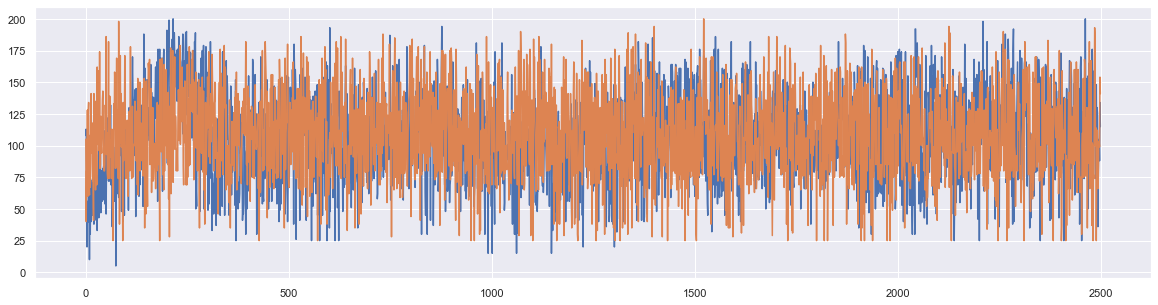

In [10]:
# Here we create a figure instance, and two subplots
fig = plt.figure(figsize=(20,5))
plt.plot(rList)
plt.plot(rList2)

In [11]:
rolling_mean = rList.rolling(window=20).mean()

AttributeError: 'list' object has no attribute 'rolling'

In [ ]:
ax = sns.heatmap(Q[:,:])